This notebook contains the code for the EDA for CO2 Emissions by Country. 
Explanations for the code will be provided with markdown cells if applicable. More in depth reasonings and theory can be found in the thesis.

**What we are measuring written below:**
Mean value  
Median value 
normal distribution 
Relations between columns
Top 10 highest CO2 Emissions by Country
Top 10 lowest CO2 Emissions by Country

**Cleaning methodologies written below:**
extreme values with max and min values (0,1%  1%  2,5%  5%)
raw (no cleaning)
Remove row with empty value (null)
Replace empty values with the mean value **check this later**
Normalize

**Metrics for each column**
This was not included in the documentation so these where researched and added here.  
'Year', 'Total', 'Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other', = Megatonnes (unclear if it´s metric tonnes, long tonnes or short tonnes however.) We have chosen to refer them as Megatonnes.
per capita = tons
per caipta example: Austria 2014 61,16 megatonnes total devided by 8 546 000 (official population estimate with a simple google search) gets 7,507605 with the dataset pointing at 7.507548. 

In [174]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
# suppress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

try:
    dataCo2 = pd.read_csv('CO2.csv')
    dataCo2= pd.DataFrame(dataCo2)
except:
    FileNotFoundError 
    print("data can´t be found")

print(dataCo2) # to see the basic structure of the data


           Country ISO 3166-1 alpha-3  Year         Total          Coal  \
0      Afghanistan                AFG  1750      0.000000           NaN   
1      Afghanistan                AFG  1751      0.000000           NaN   
2      Afghanistan                AFG  1752      0.000000           NaN   
3      Afghanistan                AFG  1753      0.000000           NaN   
4      Afghanistan                AFG  1754      0.000000           NaN   
...            ...                ...   ...           ...           ...   
63099       Global                WLD  2017  36096.739276  14506.973805   
63100       Global                WLD  2018  36826.506600  14746.830688   
63101       Global                WLD  2019  37082.558969  14725.978025   
63102       Global                WLD  2020  35264.085734  14174.564010   
63103       Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
0               NaN       

In [175]:
# Rename coulmn names to be more readable
dataCo2=dataCo2.rename({"ISO 3166-1 alpha-3": "ISO Code", "Total":"Total Co2 Emission (Mt)", "Per Capita":"Per Capita (t)"},axis=1)
print(dataCo2.columns,"\n")


Index(['Country', 'ISO Code', 'Year', 'Total Co2 Emission (Mt)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita (t)'],
      dtype='object') 



In [176]:
dataCo2.describe() # to get some basic information about the dataset


,Year,Total Co2 Emission (Mt),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita (t)
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


In [177]:
print("number of nan values per column\n",dataCo2.isna().sum()) # check for nan values.

number of nan values per column
 Country                        0
ISO Code                    1632
Year                           0
Total Co2 Emission (Mt)      200
Coal                       41360
Oil                        41387
Gas                        41486
Cement                     42290
Flaring                    41554
Other                      61484
Per Capita (t)             44130
dtype: int64


In [178]:
for country in dataCo2["Country"].unique():
    print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bonaire, Saint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Christmas Island
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czech Republic
North Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faeroe Islands
Micronesia (Federated States of)
Fiji
Finland
Panama Canal Zone
France
French Equatorial Africa
French Guiana
French Polynesia
French West Africa
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guadeloupe
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong K

**The start of analysis without any datacleaning**
This will be the baseline going forward to compare to. 

In [179]:
print(dataCo2.mean())

Year                       1885.500000
Total Co2 Emission (Mt)      55.224788
Coal                         73.968916
Oil                          55.760624
Gas                          23.504285
Cement                        4.330443
Flaring                       1.712695
Other                        10.951389
Per Capita (t)                4.413363
dtype: float64


In [180]:
print(dataCo2.median()) 
# Here we run into the issue with going back in time so much. Many countries didn´t have fully functioning industries back in 1750.

Year                       1885.500000
Total Co2 Emission (Mt)       0.000000
Coal                          0.271852
Oil                           1.044240
Gas                           0.000000
Cement                        0.022756
Flaring                       0.000000
Other                         1.255329
Per Capita (t)                1.303949
dtype: float64


In [181]:
print(dataCo2.std()) #Standard deviation

Year                        78.519728
Total Co2 Emission (Mt)    824.845435
Coal                       598.986992
Oil                        519.034563
Gas                        247.674772
Cement                      50.305770
Flaring                     16.727067
Other                       39.034073
Per Capita (t)              17.432815
dtype: float64


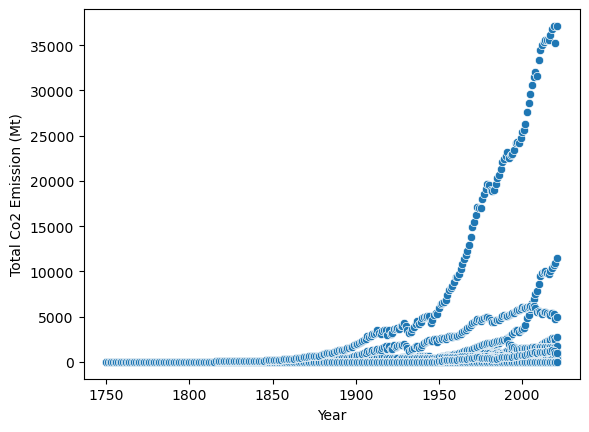

In [182]:
sbn.scatterplot(x=dataCo2['Year'], y=dataCo2['Total Co2 Emission (Mt)'])
plt.show()

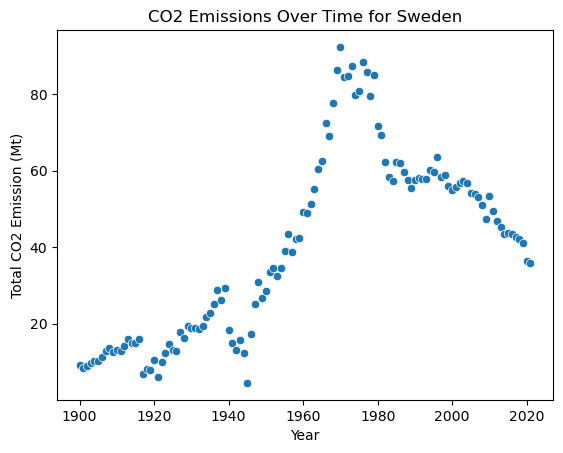

In [183]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

# Filter the data for the time period you're interested in (e.g., after 1900)
filtered_data = country_data[country_data['Year'] >= 1900]

# Plot CO2 emissions over time for the selected country and time period
sbn.scatterplot(x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
plt.title(f'CO2 Emissions Over Time for {country_name}')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

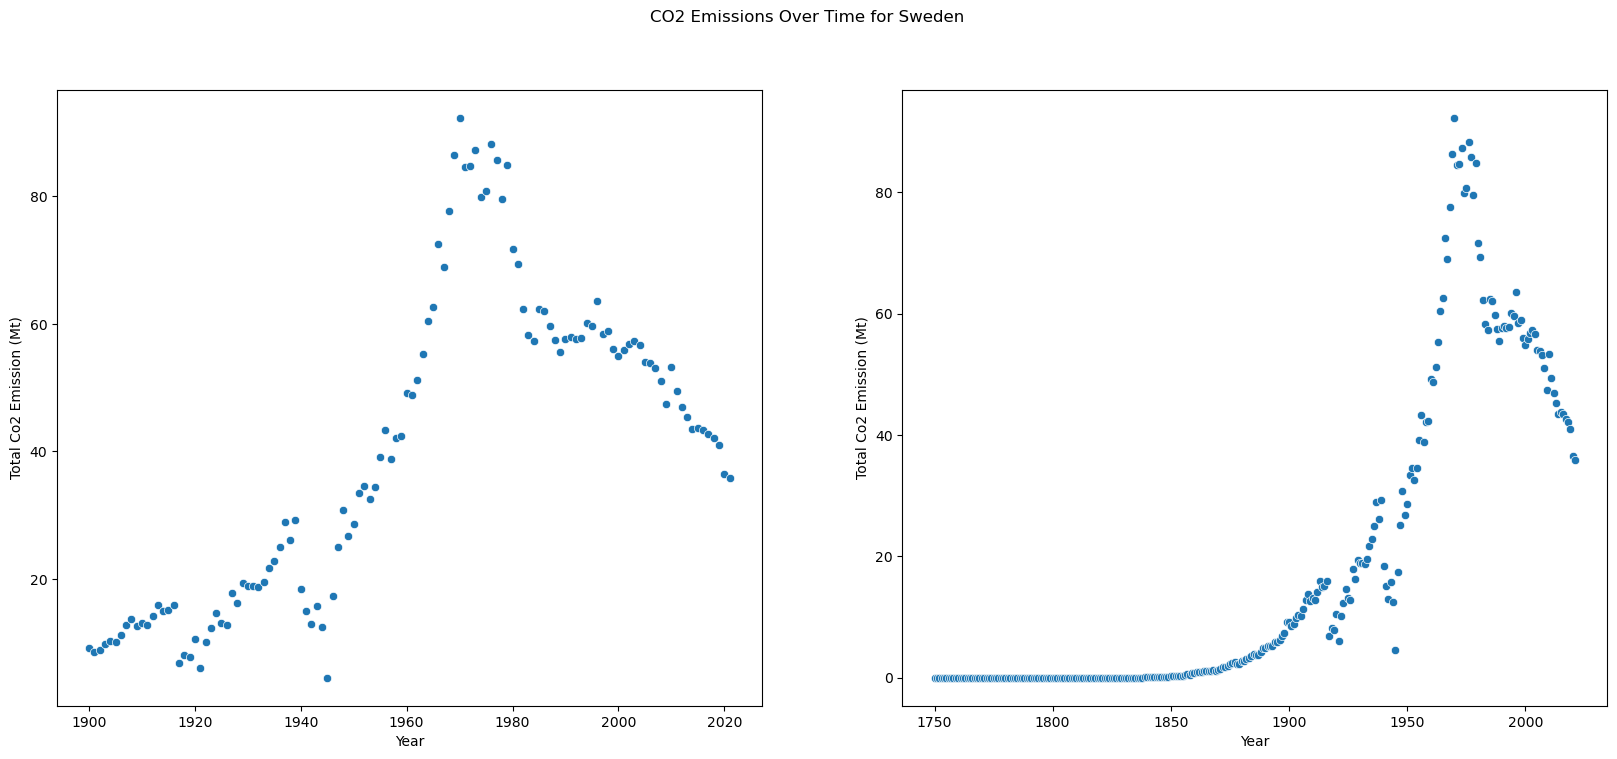

In [184]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[country_data['Year'] >= 1900]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for {country_name}')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=dataCo2, x=country_data['Year'], y=country_data['Total Co2 Emission (Mt)'])


<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

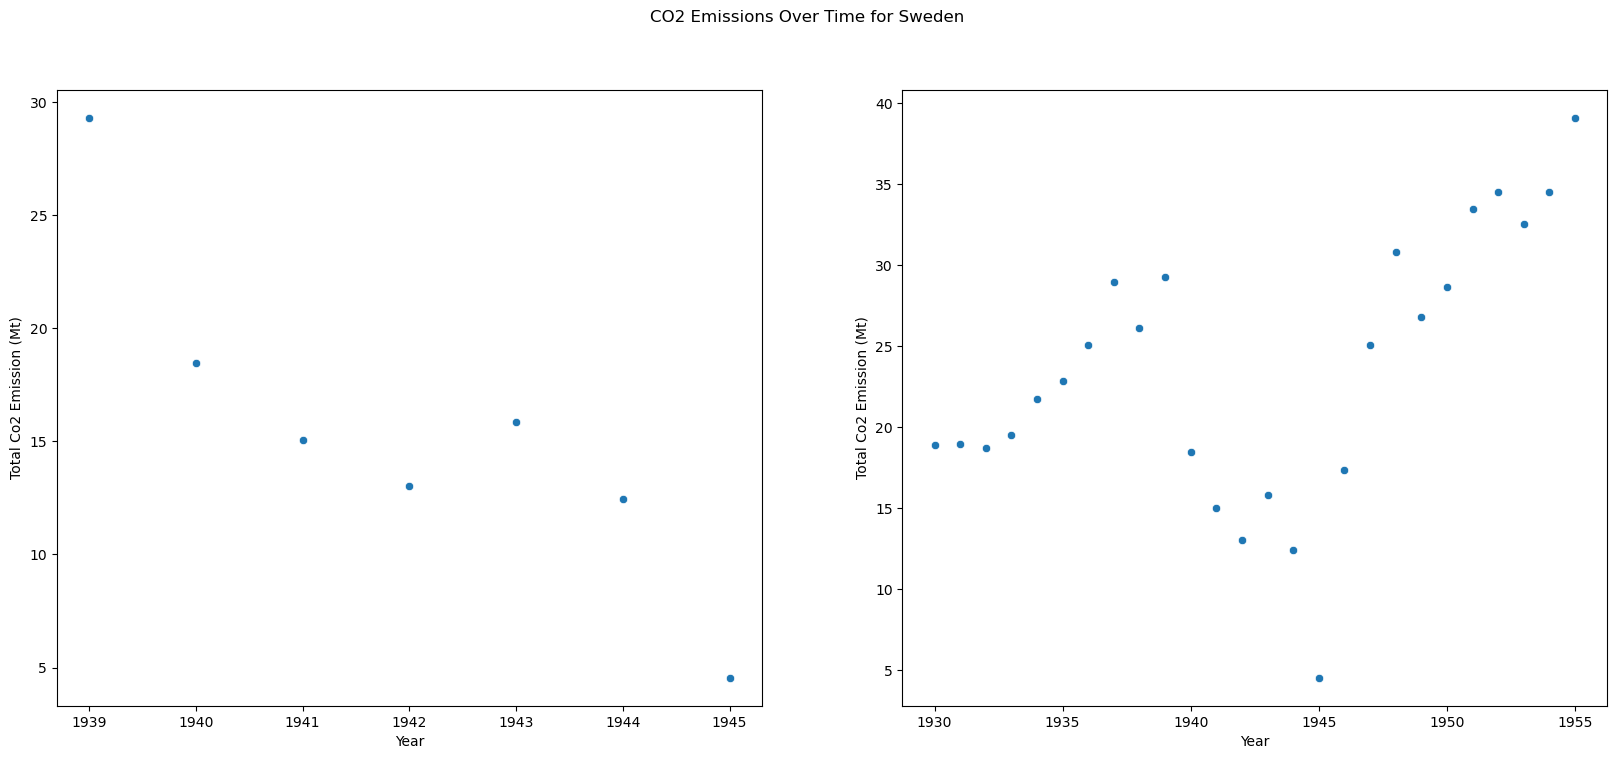

In [185]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[(country_data['Year'] >=1939) & (country_data['Year'] <=1945)]
filtered_data2 = country_data[(country_data['Year'] >=1930) & (country_data['Year'] <=1955)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for {country_name}')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=filtered_data2, x=filtered_data2['Year'], y=filtered_data2['Total Co2 Emission (Mt)'])

Text(0.5, 1.0, 'World war 2')

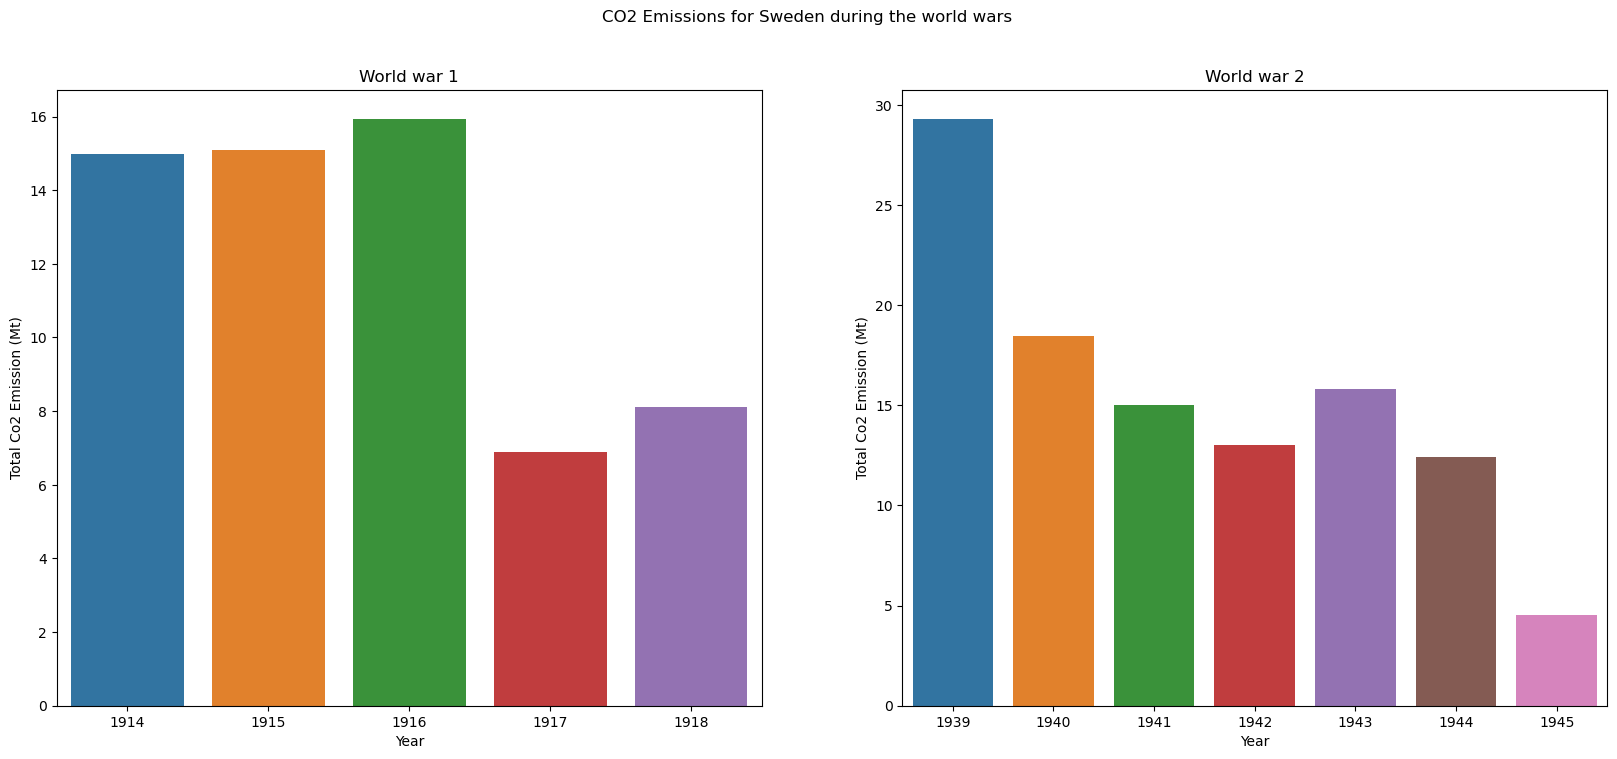

In [186]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[(country_data['Year'] >=1914) & (country_data['Year'] <=1918)]
filtered_data2 = country_data[(country_data['Year'] >=1939) & (country_data['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions for {country_name} during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Total Co2 Emission (Mt)')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Total Co2 Emission (Mt)')
axes[1].set_title('World war 2')

<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

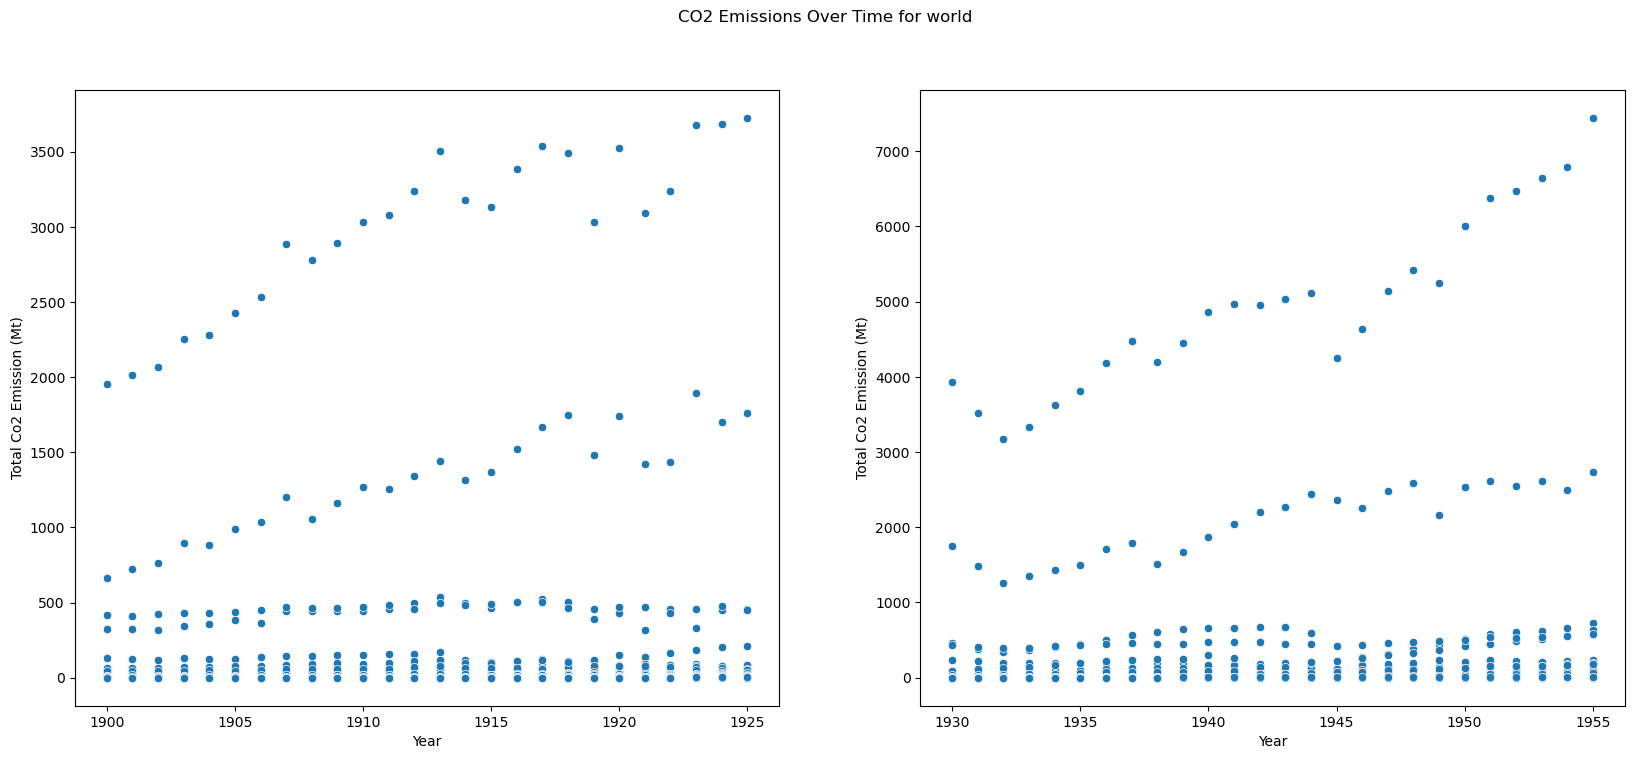

In [187]:
# Might delete this. Decide later. 
filtered_data = dataCo2[(dataCo2['Year'] >=1900) & (dataCo2['Year'] <=1925)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1930) & (dataCo2['Year'] <=1955)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for world')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=filtered_data2, x=filtered_data2['Year'], y=filtered_data2['Total Co2 Emission (Mt)'])

In [188]:

baseline = dataCo2[(dataCo2['Year'] >=1900)]
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

# remove year since it´s pointless and to make the output more readable
dataCo2_mean = dataCo2.drop(columns=['Year']).mean()
baseline_mean = baseline.drop(columns=['Year']).mean()
filtered_data_mean = filtered_data.drop(columns=['Year']).mean()
filtered_data2_mean = filtered_data2.drop(columns=['Year']).mean()

# Concatenating the means horizontally
side_by_side = pd.concat([dataCo2_mean, baseline_mean, filtered_data_mean, filtered_data2_mean], axis=1)
side_by_side.columns = ['full dataset', '1900 & forward', 'World war 1', 'World war 2']  

# Printing the concatenated DataFrame
print(side_by_side)
# Here we have a problem. Coal exceeds the total emission which makes no sense.
# Let´s investigate

                         full dataset  1900 & forward  World war 1  \
Total Co2 Emission (Mt)     55.224788      119.916547    28.973611   
Coal                        73.968916       80.513012    93.705068   
Oil                         55.760624       63.617693     6.549887   
Gas                         23.504285       26.814614     1.075195   
Cement                       4.330443        4.956493     0.008792   
Flaring                      1.712695        1.953972     0.000000   
Other                       10.951389       10.951389     2.405880   
Per Capita (t)               4.413363        4.626728     2.901938   

                         World war 2  
Total Co2 Emission (Mt)    41.577452  
Coal                       76.713771  
Oil                        18.822017  
Gas                         3.600456  
Cement                      0.637695  
Flaring                     0.000000  
Other                       3.824679  
Per Capita (t)              3.198558  


Text(0.5, 1.0, 'World war 2')

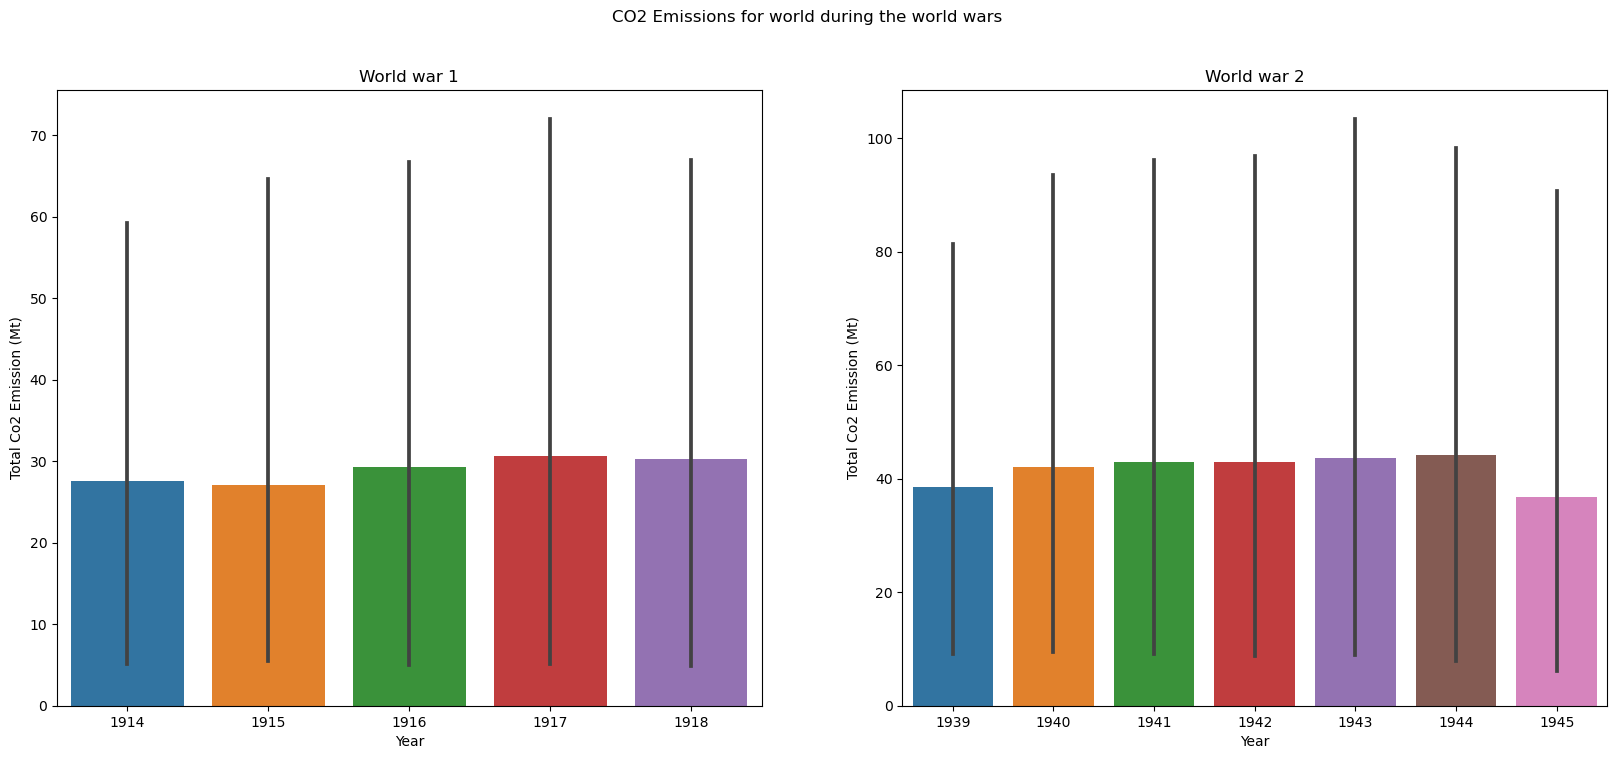

In [189]:
# Let´s start with visualizing the previous result. First the total emission
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions for world during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Total Co2 Emission (Mt)')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Total Co2 Emission (Mt)')
axes[1].set_title('World war 2')

Text(0.5, 1.0, 'World war 2')

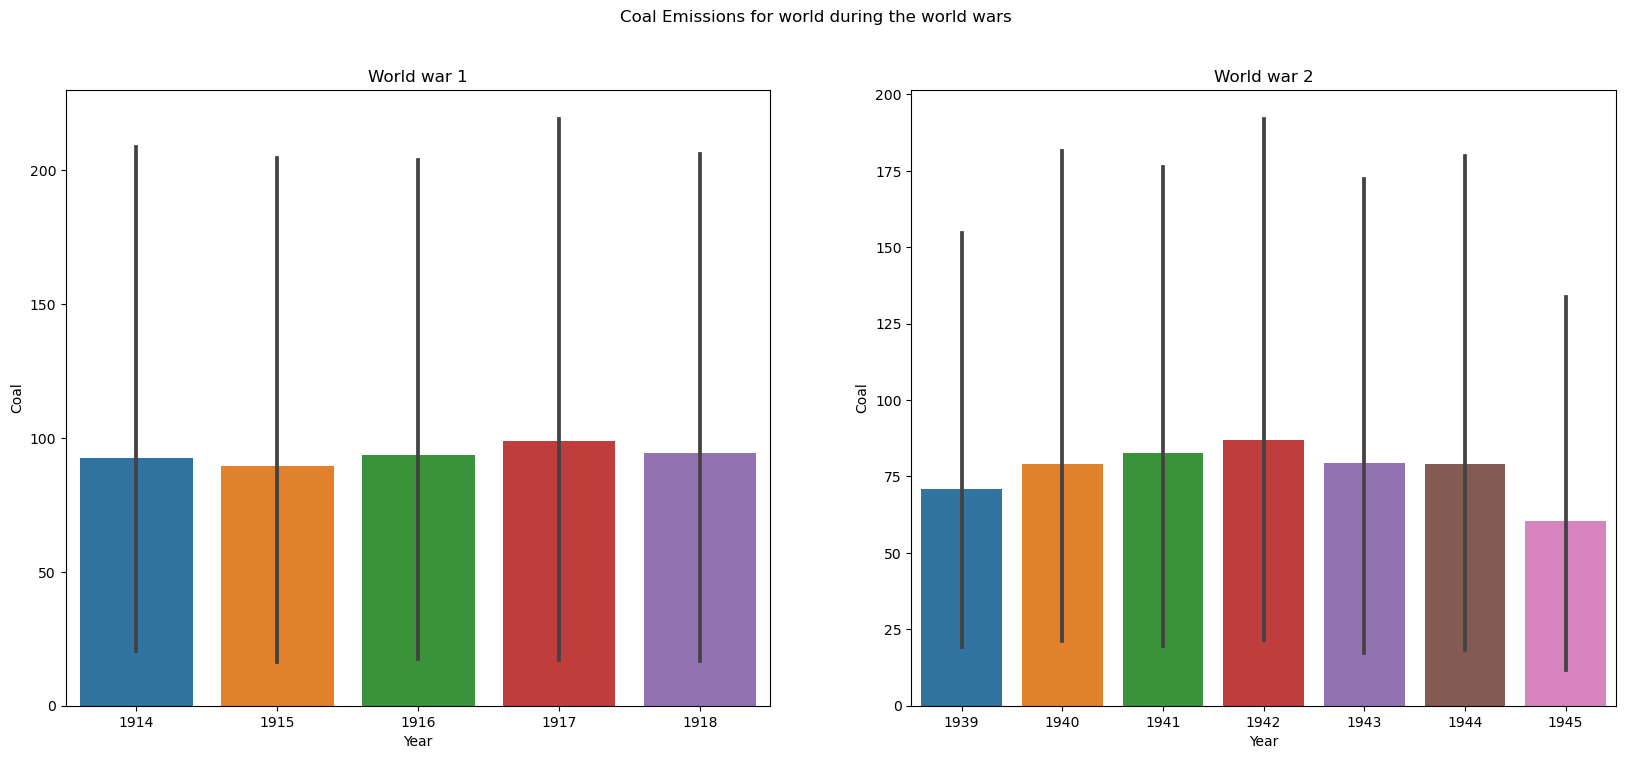

In [190]:
# And now the coal.
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'Coal Emissions for world during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Coal')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Coal')
axes[1].set_title('World war 2')

In [197]:
# Now let´s have a look at the missing values
side_by_side = pd.concat([filtered_data.count()+filtered_data.isna().sum(), filtered_data.isna().sum(), filtered_data2.count()+filtered_data2.isna().sum(), filtered_data2.isna().sum()], axis=1)
side_by_side.columns = ['World war 1 full', 'World war 1 nan', 'World war 2 full', 'World war 2 nan']  

# Printing the concatenated DataFrame
print(side_by_side)
# Here is the culprit of the misleading results. It ignores the missing values from the calculation and therefore the average goes up. Instead of deviding with 1155 like the total it´s 330 here.
# print(30922.672382/1155) # This is a more accurate comparison with the total Co2 emission for World war 1. 
# Take the total coal emission and devide it with the number of filled "Total Co2 Emission (Mt)" rows
# print(filtered_data.sum(),"\n")
# print(filtered_data.isna().sum(),"\n") 
# print(filtered_data.count(),"\n")
# print(30922.672382/330)

                         World war 1 full  World war 1 nan  World war 2 full  \
Country                              1160                0              1624   
ISO Code                             1160               30              1624   
Year                                 1160                0              1624   
Total Co2 Emission (Mt)              1160                5              1624   
Coal                                 1160              830              1624   
Oil                                  1160              830              1624   
Gas                                  1160              830              1624   
Cement                               1160              988              1624   
Flaring                              1160              835              1624   
Other                                1160             1155              1624   
Per Capita (t)                       1160             1045              1624   

                         World war 2 na

In [198]:
print("To be continued...")

To be continued...
